## Installs & Imports

In [25]:
# Select Tensorflow 2.x version in Colab
%tensorflow_version 2.x

# Import TensorFlow and tf.keras
import tensorflow as tf
keras = tf.keras

# Import helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Print TensorFlow version
version = tf.__version__
print(version)

2.1.0-rc1


## Data


 ### 1. Load the MNIST dataset

In [0]:
# Load mnist from keras datasets
mnist = keras.datasets.mnist

In [0]:
# Get the training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2. Explore the MNIST dataset

In [28]:
# Inspect the training and test dataset shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape (10000,)


In [0]:
# Take a look at one of the training images
index = 0

In [30]:
# First let's look at the label of the image
print(y_train[index])

5


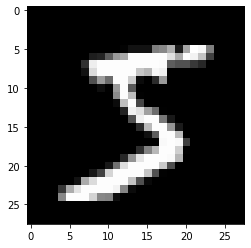

In [31]:
plt.imshow(x_train[index], cmap="gray")

In [32]:
print(x_train[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [33]:
# Check datatype of x_train
x_train.dtype

dtype('uint8')

### 2. Data preprocessing

In [0]:
# Convert data to float32 and normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [35]:
x_train.dtype

dtype('float32')

In [36]:
x_train[index]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
# Reshape input data from (28, 28) to (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [38]:
# Take a look at the dataset shape after conversion with keras.utils.to_categorical
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape", y_test.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1) y_test shape (10000,)


In [0]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [40]:
y_train[index]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model Training

### Define the model architecture
There are 3 ways to define a model with tf.Keras:
1. Sequential API
2. Functional API
3. Model subclassing

We will create a simple Convolutional Neural Network with the Sequential model API.

![alt text](https://drive.google.com/uc?id=1Ci3xJ7zJ1rhAB_b_sHWwjrPAjl-8gCbY)

In [0]:
def create_model():
  
  # Define the model architecture
  model = keras.models.Sequential([
    # Must define the input shape in the first layer of the neural network
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  # Compile the model
  model.compile(loss=keras.losses.categorical_crossentropy,
         optimizer=keras.optimizers.Adam(),
         metrics=['accuracy'])
      
  return model

In [42]:
model = create_model()

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
__________________________________________________

In [43]:
%%time 
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1886 - accuracy: 0.9459
Epoch 2/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0551 - accuracy: 0.9829
Epoch 3/3
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0402 - accuracy: 0.9872
CPU times: user 10.6 s, sys: 1.16 s, total: 11.8 s
Wall time: 9.86 s


### Model evaluation

In [44]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss", test_loss)
print('Test Accuracy:', test_accuracy)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0339 - accuracy: 0.9883
Test Loss 0.03388036277220817
Test Accuracy: 0.9883


In [0]:
predictions = model.predict(x_test)

In [0]:
index = 99

In [47]:
np.argmax(predictions[index])

9

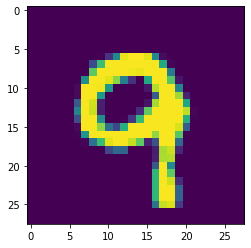

In [48]:
plt.imshow(np.squeeze(x_test[index]))